## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **Table of content**

*  Loading Data

*  Checking for NaN values 

*  Handling NaNs

*  Analysis





## **Questions for analysis are as follows**
**1) Which hosts are having heighest number of appartments ?**

**2) Which are the top 15 neighbourhood which are having maximum number of appartments for airbnb in the respective neighbourhood ?**

**3) top 5 neighbourhood in each group which are having maximum prices in thier rspective neighbourhood_group ?**

**4) How neighborhood is realted with reviews ?**

**5) What can we learn from predictions? (ex: locations, prices, reviews, etc) location learning**

**6) What is the distribution of the room type and its distribution over the location ?**



**7) How does the Room_type is distributed over Neighbourhood_Group are the ratios of respective room_types more or less same over each neighbourhood_group ?**

**8) How the price column is distributed over room_type and are there any Surprising items in price column ?**


**9) Which are the top 10 hosts that have obatained heighest no. of reviews ?**

**10) What is the average preferred price by customers according to the neighbourhood_group for each category of Room_type?**

**11) What is the average price prefred for Keeping good number_of_reviews according to neighbourhood_group ?**


**12) Which neighbourhood have most of the host focused to own property ?**



In [ ]:

#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Lets check out the columns having **null values**

In [ ]:
df.loc[:,df.isna().sum()!=0]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)
print(f'the percentage of data having availibity as 0 is {percentage_of_data_having_availbility_0}')

the percentage of data having availibity as 0 is 35.86


**As we can clearly notice that availiabilty column is having minmum value and  as well as 25th percentile is 0 , so this seems unnatural beacuse having availability days 0 for 36% of data is bit surpricing , If you have a business of providing room/apartment for rent in Airbnb your availibility is 0 days that is extreme case and extreme cases is obviously shocking when it comes 36% of data is having extreme case**

**but its not practicaly possible to exactly detect which apartments are having realy availabilty 0 days , so we will not alter this column as if we try to alter we can end up manipulating appartments which are really mostly busy (i.e 0 no. of days availibility)**

.

.

.

**We can also clearly see that minimum price is 0 , which is surprising as price 0 doesnt make sense to do business**

## **lets check out the last_review wise count of where availability_365 is 0** 

In [ ]:
df[df['availability_365']==0].groupby(['last_review']).size().sort_values(ascending=False).head(10)

last_review
2019-01-01    194
2018-01-01    142
2019-01-02    129
2019-06-23     90
2018-01-02     86
2017-01-01     85
2019-05-27     75
2017-01-02     73
2016-01-02     67
2019-07-01     63
dtype: int64

**lets fill these datas with appropriate price values (by filling the price with median price for each room_type)**

In [ ]:
df.loc[ (df.room_type=='Entire home/apt') & (df.price==0),'price']=df.loc[ (df.room_type=='Entire home/apt') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Private room') & (df.price==0),'price']=df.loc[ (df.room_type=='Private room') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Shared room') & (df.price==0),'price']=df.loc[ (df.room_type=='Shared room') & (df.price!=0),'price'].median()


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.739094,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.146276,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**NOTE:  We can notice that we have succesfully updated the price column where we have values as 0 , we succesfully updated the value with respective price value**

In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)

## **Question 1) Which hosts are having heighest number of appartments ?**

***In this I will try demonstrate that  why we need to go with host_id rather than host_name***

In [ ]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
df["host_id"].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

**From this we can see that host name Michael its appearing 417 times in the host_name column , so this might imply that michael is having heighest number of rooms , but from the host_id column its showing heighest appearance of any host_id is 327 , so this clearly implies that there can be multiple person may have same name thats why we are getting different heighest apperance in host_name as compared to host_id**


    
     
      
       
        
         
          

  

**lets check which host_name is actually having heighest number of appartments**

In [ ]:
df[df['host_id']==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

So **Sonder (NYC)** is having maximum numbers of rooms for the guest, For Airbnb he might be very important person then.

In [ ]:
df_sonder=df[df['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']].head(10)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38293,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
39771,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446
39772,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616
39773,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744
39774,Sonder (NYC),Manhattan,Murray Hill,40.74884,-73.97589
39775,Sonder (NYC),Manhattan,Hell's Kitchen,40.76079,-73.99807


**so Sonder (NYC) is having multiple appartments in same building in different different neighbourhood**



.

.


.

## **Question 2) Which are the top 15 neighbourhood which are having maximum number of appartments for airbnb ?**

In [ ]:
df['neighbourhood'].value_counts().head(15)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

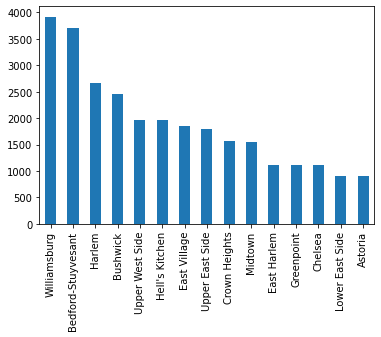

In [ ]:
# plotting top 15 neighbourhood which are having maximum number of appartments for airbnb in the respective neighbourhood

pd.value_counts(df['neighbourhood'])[:15].plot.bar()


In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

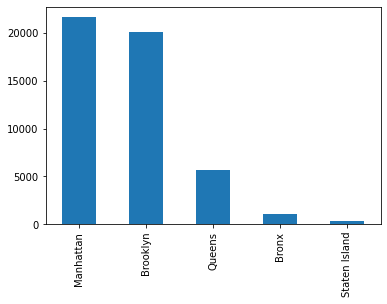

In [ ]:
pd.value_counts(df['neighbourhood_group']).plot.bar()


## **Question 3) top 5 neighbourhood in each group which are having maximum prices in thier respective neighbourhood_group ?**

In [ ]:
# top 5 neighbourhood in thier respective neibhorhood group which are having maximum prices
df_manhattan=df[df['neighbourhood_group']=='Manhattan']
df_queens=df[df['neighbourhood_group']=='Queens']
df_brooklyn=df[df['neighbourhood_group']=='Brooklyn']
df_bronx=df[df['neighbourhood_group']=='Bronx']
df_staten=df[df['neighbourhood_group']=='Staten Island']

# top 5 neighbourhood in Manhattan which are having maximum prices 
print('Top 5 neighbourhood in Manhattan which are having maximum prices ')
df_manhattan.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(5)

Top 5 neighbourhood in Manhattan which are having maximum prices 


,neighbourhood,price
0,Upper West Side,10000
1,East Harlem,9999
2,Lower East Side,9999
3,Tribeca,8500
4,Upper East Side,7703


In [ ]:
# top 5 neighbourhood in Staten Island which are having maximum prices 
print('Top 5 neighbourhood in Staten Island which are having maximum prices')
df_staten.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(5)

Top 5 neighbourhood in Staten Island which are having maximum prices


,neighbourhood,price
0,Randall Manor,5000
1,Prince's Bay,1250
2,St. George,1000
3,Fort Wadsworth,800
4,Woodrow,700


In [ ]:
# top 5 neighbourhood in bronx which are having maximum prices 
print('Top 5 neighbourhood in bronx which are having maximum prices')
df_bronx.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(5)

Top 5 neighbourhood in bronx which are having maximum prices


,neighbourhood,price
0,Riverdale,2500
1,City Island,1000
2,Longwood,680
3,Westchester Square,670
4,Mott Haven,500


In [ ]:
# top 5 neighbourhood in Queens which are having maximum prices 
print('Top 5 neighbourhood in Queenswhich are having maximum prices')
df_queens.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(5)

Top 3 neighbourhood in Queenswhich are having maximum prices


,neighbourhood,price
0,Astoria,10000
1,Bayside,2600
2,Forest Hills,2350
3,Long Island City,2000
4,Arverne,1500


In [ ]:
# top 5 neighbourhood in brooklyn which are having maximum prices 
print('Top 5 neighbourhood in brooklyn which are having maximum prices')
df_brooklyn.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(5)

Top 5 neighbourhood in brooklyn which are having maximum prices


,neighbourhood,price
0,Greenpoint,10000
1,Clinton Hill,8000
2,East Flatbush,7500
3,Bedford-Stuyvesant,5000
4,Cypress Hills,5000


# **Question 4) How  neighbourhood is affect  reviews ?**

### **Top7 Neighbourhood is having heighest review per month**

In [ ]:
df.groupby(['neighbourhood'])['reviews_per_month'].max().sort_values(ascending=False).reset_index().head(7)

,neighbourhood,reviews_per_month
0,Theater District,58.50
1,Rosedale,20.94
2,Springfield Gardens,19.75
3,East Elmhurst,16.22
4,Jamaica,15.32
5,Williamsburg,14.00
6,Hell's Kitchen,14.00


## **Top 7 Neighbourhood is having heighest number of reviews**

In [ ]:
df.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(7)

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,110352
1,Williamsburg,85427
2,Harlem,75962
3,Bushwick,52514
4,Hell's Kitchen,50227
5,East Village,44670
6,East Harlem,36446


# **Question 5)  What can we learn from predictions? (ex: locations, prices, reviews, etc) location learning**

**First we will try to visualize the location of each apprtment usinglatitude and longitude values**

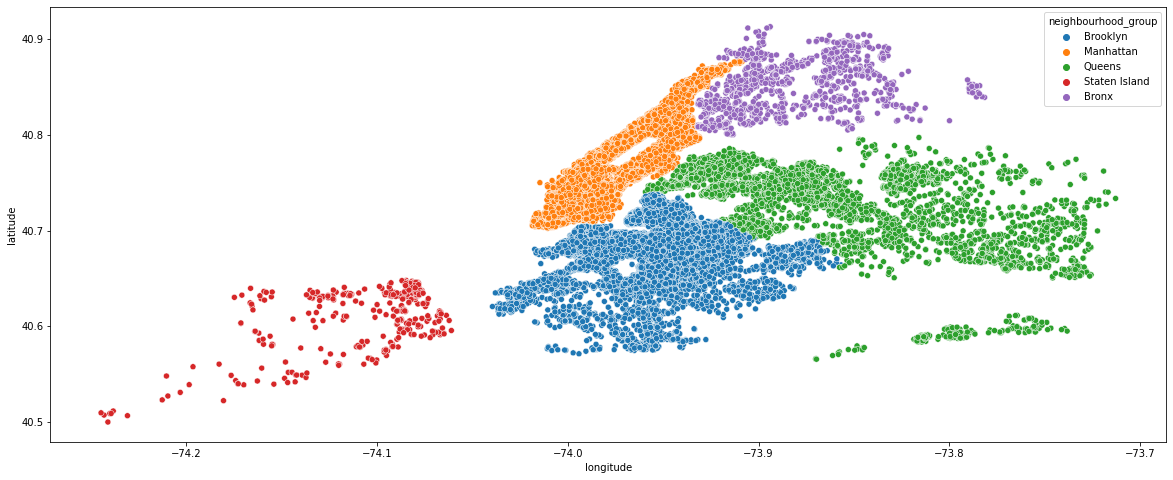

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['neighbourhood_group'])
plt.show()

### **Question 6) What is the distribution of the room type and its distribution over the location  ?** 

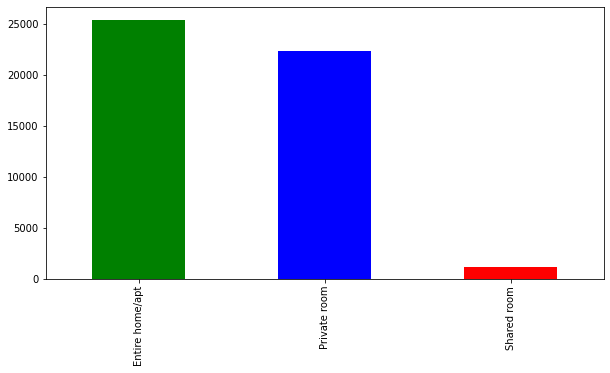

In [ ]:
plt.figure(figsize=(10,5))
df['room_type'].value_counts().plot(kind='bar',color=['g','b','r'])

#### **So  we can notice the following** 

#### **1) that maximum numbers of room are Entire home/Apartment and Private room there are only few shared rooms .** 

#### **2)So mostly host prefer to give Entire home/Appartment or Private Rooms rather than Shared rooms**

**lets see how room_type is distributed over all location ,is there any place where there is a dominance of any particular room_type over the others despite of thier overall ratios ?**

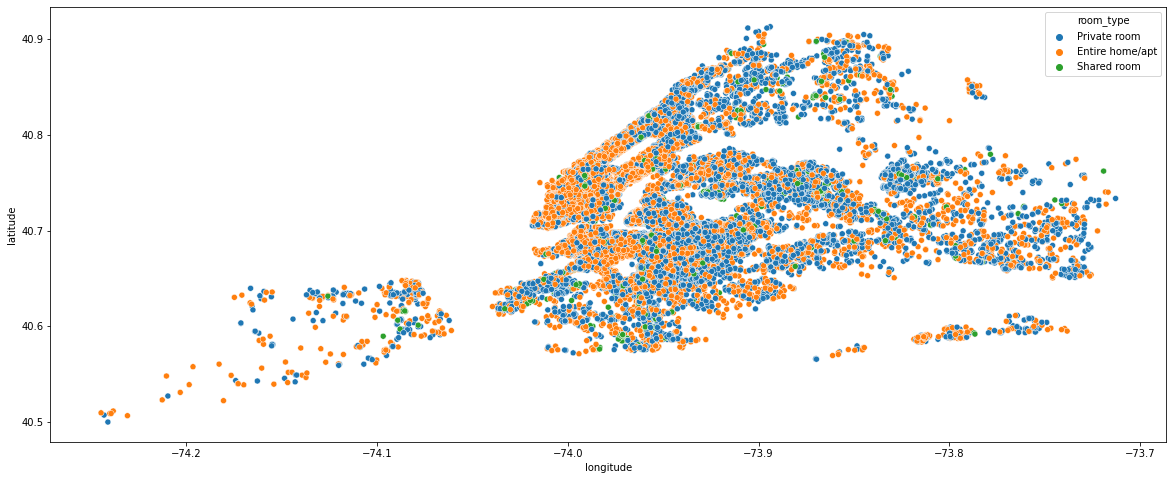

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['room_type'])
plt.show()


## **Question 7)    How does the Room_type is distributed over Neighbourhood_Group are the ratios of respective room_types more or less same over each neighbourhood_group ?**

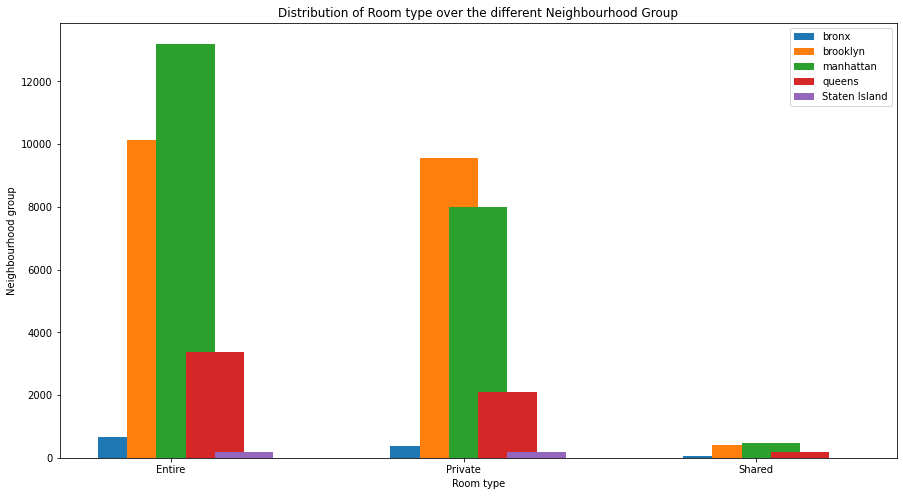

In [ ]:

plt.figure(figsize=(15,8))
N=5  # number of bars in each category
ind = np.arange(3)
width=0.3

# storing the values of all values counts by the room_type for specific neighbourhood_group

bronx_values=df_bronx['room_type'].value_counts().values
brooklyn_values=df_brooklyn['room_type'].value_counts().values
manhattan_values=df_manhattan['room_type'].value_counts().values
queen_values=df_queens['room_type'].value_counts().values
staten_values=df_staten['room_type'].value_counts().values
# plotting the values 
plt.bar(ind,bronx_values,0.2,label='bronx')
plt.bar(ind+0.1,brooklyn_values,0.2,label='brooklyn')
plt.bar(ind+0.2,manhattan_values,0.2,label='manhattan')
plt.bar(ind+0.3,queen_values,0.2,label='queens')
plt.bar(ind+0.4,staten_values,0.2,label='Staten Island')
plt.xlabel('Room type')
plt.ylabel('Neighbourhood group')
plt.title('Distribution of Room type over the different Neighbourhood Group')

plt.xticks(ind + width / 2, ('Entire', 'Private', 'Shared'))

plt.legend(loc='best')
plt.show()

This seems more or less same ratio in every neighbourhood, 

.

.


### **Question 8) How the price column is distributed over room_type and are there any Surprising items in price column ?**

In [ ]:
# from the previous exploration we get to know that price column is having many values as 0 as it doesnt make sense
# so we  will try to get rid of those instances for analysis of price column 
df_price=df[df['price']!=0].copy()

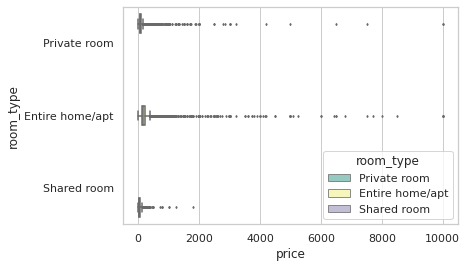

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5,data=df_price)


**we can notice that there are many outliers for price  in each of the room_type  category, so lets just why there is so high price or what else we can conclude for hosts having highest price for the rooms**

In [ ]:
# lets check out the who is having highest price of all 
# and we will check its rating, minimum nights, availability_365  and last reviews in order judge 

df[df['price']==df['price'].max()][['host_name','reviews_per_month','last_review','availability_365','price','neighbourhood_group']]

,host_name,reviews_per_month,last_review,availability_365,price,neighbourhood_group
9151,Kathrine,0.04,2016-02-13,0,10000,Queens
17692,Erin,0.16,2017-07-27,0,10000,Brooklyn
29238,Jelena,0.00,NaN,83,10000,Manhattan


**Clearly if i would have working in Airbnb I would have suggested the following** 

**1)    kathrine and Erin have price so high and having no availability then what is the benifit of keeping too high price  .**


**2) The last review is also 2-3 years back (as the data was collected in 2019)  which is also bad** 


**3) The review may be low as there may be very few people who is staying in kathrine, Erin and jelena apartment so might have less reviews per month**


**4) I would have suggested to keep moderate(average) price so that more people would visit and stay in her appartment , it would also increase her reviews per month**


## **Question 9)   Which are the top 10 hosts that have  obatained heighest no. of reviews ?**

In [ ]:
host_highest_df=df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_highest_df.head(10)


,host_id,host_name,number_of_reviews
21304,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18626,26432133,Danielle,2017
20872,35524316,Yasu & Akiko,1971
21921,40176101,Brady,1818
7362,4734398,Jj,1798
14707,16677326,Alex And Zeena,1355
9201,6885157,Randy,1346
34629,219517861,Sonder (NYC),1281
17517,23591164,Angela,1269


## **Question 10)  What is the average preferred price by customers according to the neighbourhood_group for each category of Room_type?(affordable price which is preferred by customers)**

In [ ]:
# applying groupby over 'neighbourhood_groups' and 'room_type' 
# then applying mean of price  and unstacking for clear visualization
 
avg_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.895706,59.800000
Brooklyn,178.344283,76.541552,50.745763
Manhattan,249.251231,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


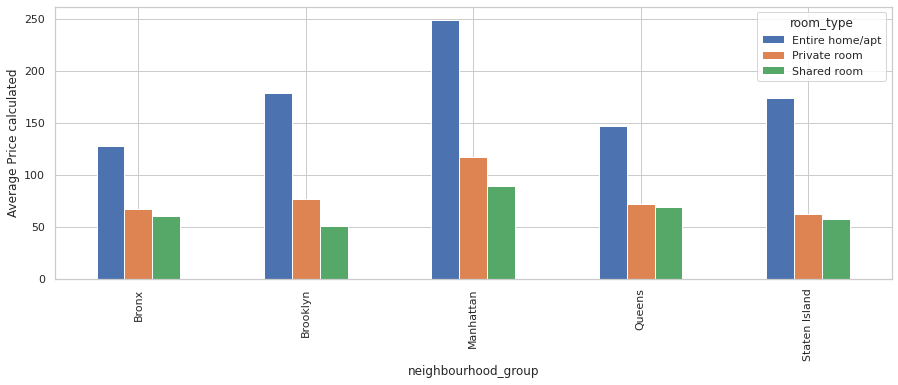

In [ ]:
avg_price_df.plot.bar(figsize=(15,5),ylabel='Average Price calculated')

### **Observations: As we can see that manhattan is most costly and bronx is cheap  for each room_type**

.

.

.

.

### **But I think we  can make it more useful for buissness implimentation if we do some  analysis on successfull hosts according to the heighest no of reviews so that we can suggest this price to our host for good buisness**

.

.


.



##    **Question 11) What is the average price prefred for Keeping good number_of_reviews according to neighbourhood_group ?**



In [ ]:
# creating a diffrent Dataframe df_succesfull_host on the actual df Dataframe on the basis of heighest number of reviews 
# first sorted the df on number_of_reviews and room_type and applied groupby on neighbourhood,room_type
# then selected neighbourhood_group, number_of_reviews, room_type and price  

df_succesfull_hosts=df.sort_values(by=['room_type','number_of_reviews'],ascending=False).groupby(['neighbourhood_group','room_type'])['neighbourhood_group','room_type','number_of_reviews','price'].head(15)
# now applying groupby on df_succesfull_hosts by neighbourhood_group and room_type then calculating average price for respected grouby objcet

avg_preffered_price_df=df_succesfull_hosts.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,92.733333,51.333333,42.066667
Brooklyn,171.533333,74.400000,36.533333
Manhattan,205.533333,85.133333,67.933333
Queens,101.800000,49.333333,42.600000
Staten Island,103.266667,51.533333,57.444444


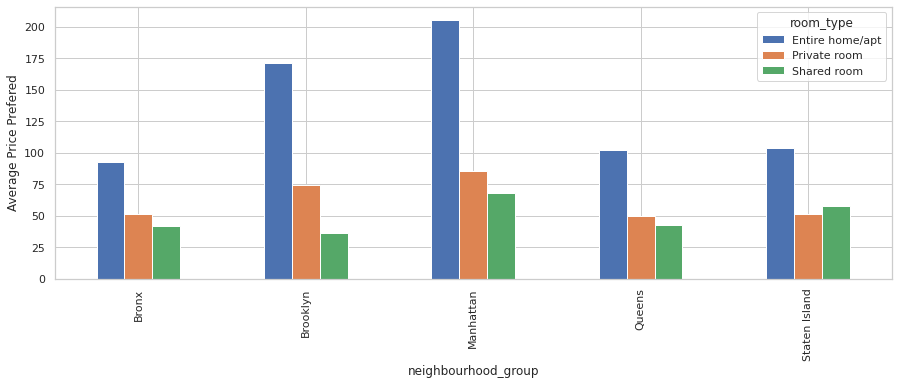

In [ ]:


avg_preffered_price_df.plot.bar(figsize=(15,5),ylabel='Average Price Prefered')

### **OBSERVATIONS**

*  **1) clearly if we compare the results with previous result (i.e when we calculated average prefered price by people in each neighbourhood_group with different room_types) we can see that this result is bit different and more usefull**





*  **2) As a analyst I would  suggest to keep price in this range to  get more number of reviews in specific room type and at particular place**




## **Question 12) Which host are busiest and why?**

**we will keep only the availability_365 > 0, beacuse availability_365 =0 doesnt required for the analysis this availability_365=0  most probably listings have stopped thier buisness with Airbnb** 

In [ ]:
# we will keep only the availability_365 > 0, beacuse availability_365 =0 doesnt required for the analysis
# this availability_365=0  most probably listings have stopped thier buisness with Airbnb 

df=df[df['availability_365']>0]


In [ ]:
df['minimum_nights'].describe()

count    31362.000000
mean         8.338658
std         23.836703
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

**we can notice that there are some outliers in the minimum_nights as for availability_365 is calculated for the period of 365 days**

In [ ]:
# we will take minimum_nights <=365 only as it makes sense
df=df[df['minimum_nights']<=365]


A metric is a system of measurement in this case 'busiest' which gives a relative comparision between the hosts. The metric defined below is a proxy to estimate the busyness of a host. The metric here using the fore-mentioned columns estimates the percentage of occupancy the property has seen in one period of business. The metric mean across various properties for a host gives the average occupancy rate/percentage the host. The higher the percentage, the busier a host is said to be.


The 3 columns afore-mentioend are taken into consideration for calculating this metric.


Firstly, the metric needs the available months (one period of business) the host is open for business/accepting bookings :-

***`available months = available days / (365/12)`***


For the given months the property is open for business, next is to estimate the maximum possible bookings a property can have through the available days, here the assumption is that, every customer stays exactly equal to minimum nights required by the listing :-

***`total possible bookings = available days / minimum nights`***


The next step is to estimate the actual number of bookings that occured in the year. The assumption made here is that the number of reviews recieved per month is analogous to that many customers on average booked/stayed in this property. Hence we will estimate bookings as :-

***`estimated bookings = reviews per month x available months`***
Using all the above calculations, the percentage of occupancy throughout the year is gives as :-

occupancy % = estimated bookings / total possible bookings x 100

**POINT TO NOTE** - According to the assumptions and calculations done above to calculate the metric, a property with 1 customer over the entire period of business as the property's total possible booking records a 100% when the estimated bookings is also 1. In simpler terms, if the expected booking count is calculated to be 1 and the property hosts 1 customer, then the property is said to be 100% busy.

In [ ]:
# designing the matrix for busy

avg_month_length = 30
df['availability_months'] = df.availability_365 / avg_month_length

df['max_possible_bookings'] = df.availability_365 / df.minimum_nights
df['booking_estimate'] = df.reviews_per_month * df.availability_months


df = df[df.booking_estimate <= df.max_possible_bookings]

df['occupancy_percentage'] = (df.booking_estimate / df.max_possible_bookings) * 100
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_months,max_possible_bookings,booking_estimate,occupancy_percentage
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,12.166667,365.000000,2.555000,0.700000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,11.833333,355.000000,4.496667,1.266667
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,12.166667,121.666667,0.000000,0.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,6.466667,194.000000,30.005333,15.466667
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,4.300000,43.000000,2.537000,5.900000
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,7.333333,110.000000,25.446667,23.133333
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,6.266667,188.000000,8.334667,4.433333
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,0.200000,1.200000,0.086000,7.166667
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39,1.300000,19.500000,1.950000,10.000000
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,10.466667,78.500000,14.025333,17.866667


**The `host_name` column as discussed before contains repeating names, the `calculated_host_listings_count` gives us a fair idea of how many properties in total a host owns. The use of `host_id` as primary for the groupby function is the only way. Followed by `host_name` for groupby since the names of the hosts is important in the analysis.
The mean is used as the aggregating function for the `occupancy_percentage` and price columns to get a fair idea about the general trend for each host, whereas for the `neighbourhood_group` and `neighbourhood` columns, the mode indicating the location where majority of host's properties reside, is used. The mode is chosen for the location columns because, the mode i.e. most frequent location for the property means the majority of contributions to the `occupancy_percentage` come from here.**

In [ ]:
grouped = df[[
    'host_id',
    'host_name',
    'occupancy_percentage',
    'price',
    'neighbourhood_group',
    'neighbourhood'
]].groupby(['host_id','host_name'])

df_occupancy = grouped.agg({
    'occupancy_percentage':'mean',
    'price':'mean',
    'neighbourhood_group':pd.Series.mode,
    'neighbourhood':pd.Series.mode
}).reset_index()

**The grouped table now contains the average occupany percentage for every host. Sorting the table to obtain the top 10 busiest hosts for Airbnb.**

In [ ]:
df_occupancy.sort_values('occupancy_percentage',ascending=False).head(10)


,host_id,host_name,occupancy_percentage,price,neighbourhood_group,neighbourhood
12641,53462017,Harry,100.0,135.0,Manhattan,Upper West Side
10984,36938850,Luke,100.0,150.0,Manhattan,Hell's Kitchen
10338,30933227,Dipti,100.0,130.0,Manhattan,Kips Bay
20521,258230385,Vangelis,100.0,176.0,Manhattan,Chinatown
1719,1349266,Adam,100.0,186.0,Brooklyn,Vinegar Hill
7580,15010630,Poma,100.0,216.0,Manhattan,Chelsea
11677,43885531,Lee,100.0,130.0,Manhattan,East Village
20448,257396181,Steven,100.0,250.0,Manhattan,Midtown
4438,5153401,Danielle,100.0,160.0,Brooklyn,Fort Greene
9213,23188519,Emily Wes,100.0,68.0,Brooklyn,Bedford-Stuyvesant


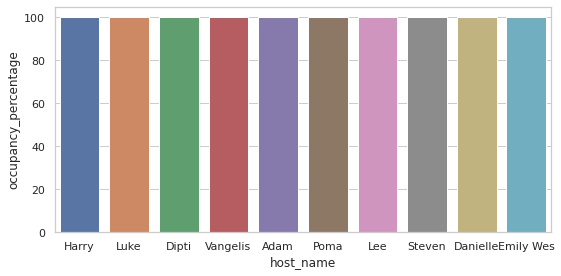

In [ ]:
plt.figure(figsize=(8,4))
sorted_val=df_occupancy[['host_name','occupancy_percentage']].sort_values(by='occupancy_percentage',ascending=False).head(10)
sns.barplot(x='host_name',y='occupancy_percentage',data=sorted_val)
plt.tight_layout()

## **Question 13) overall price analysis ?**

In this section several analysis regarding prices amd the insights we can extract from them.

First. What is the global price distribution?

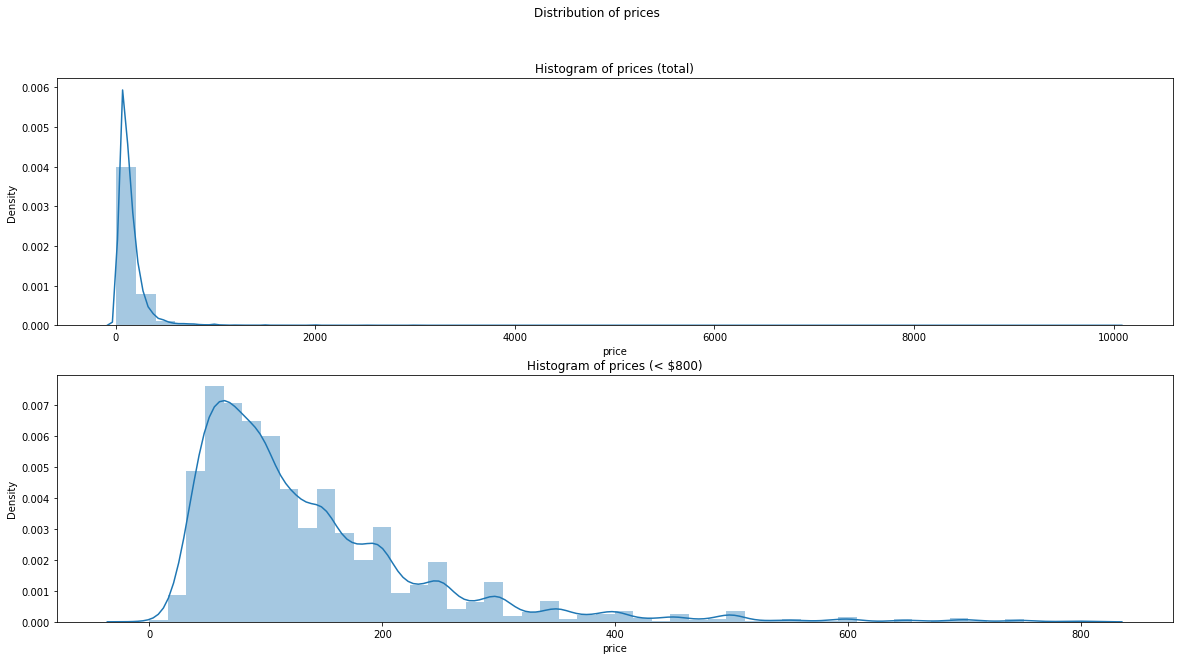

In [ ]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(df['price'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of prices (< $800)")
sns.distplot(df[df['price'] < 800]['price'], kde=True, ax=ax[1])



fig.suptitle("Distribution of prices")
fig.show()

Let's take a look at the spatial distribution of prices (Which are the most expensive zones?)

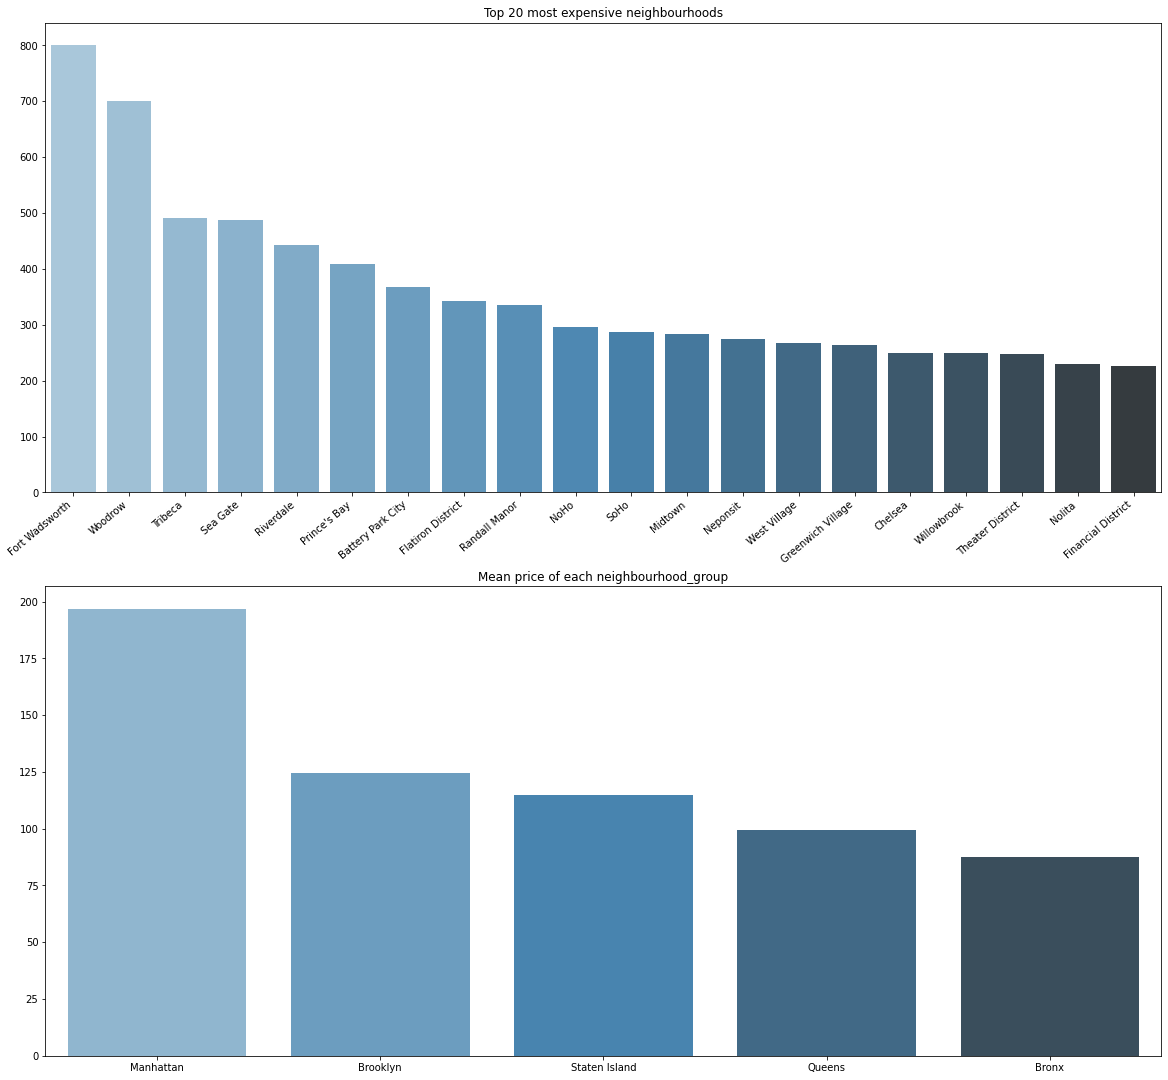

In [ ]:
d = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(d.index.tolist()[:20], d.values[:20], ax=ax[0], palette=("Blues_d"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Top 20 most expensive neighbourhoods')

d = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=("Blues_d"))
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Mean price of each neighbourhood_group')

fig.show()

We can show the same on a more "visual" way.

Note: Sometimes plotly plots bug so you have to zoom out the map and zoom in manually to see it

In [ ]:
cscale = [
          [0.0, 'rgb(165,0,38)'], 
          [0.0005, 'rgb(215,48,39)'], 
          [0.007, 'rgb(250, 152, 122)'], 
          [0.08, 'rgb(208, 254, 144)'], 
          [0.1, 'rgb(0, 255, 179)'], 
          [0.3, 'rgb(171,217,233)'], 
          [0.7, 'rgb(116,173,209)'], 
          [0.9, 'rgb(69,117,180)'], 
          [1.0, 'rgb(49,54,149)']
         ]

From the previous plots we can see that the most expensive rooms tend to be located in the Manhattan zone.

We also can study the prices depending the room type

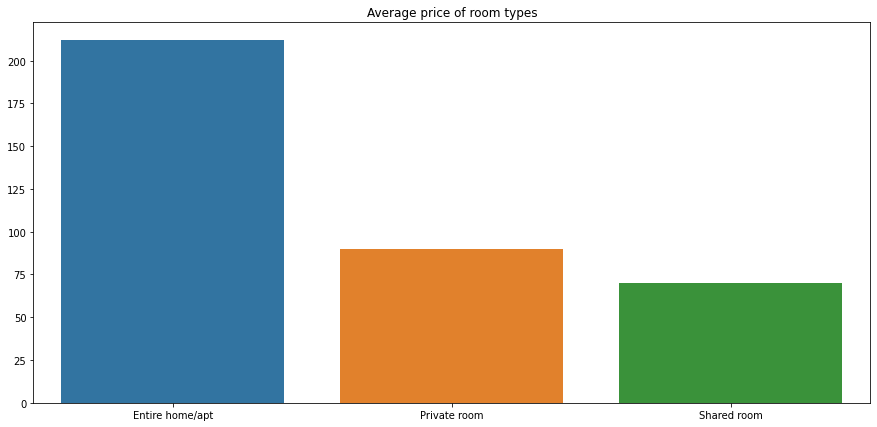

In [ ]:
d = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(15,7))
sns.barplot(d.index.tolist(), d.values, ax=ax)
ax.set_title('Average price of room types')
fig.show()

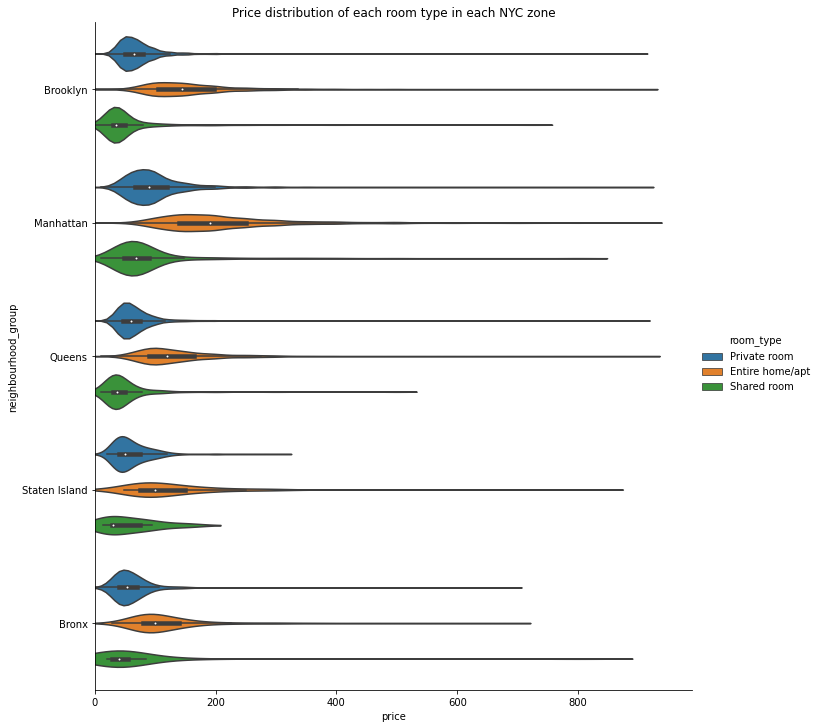

In [ ]:
f = sns.catplot(x="price", y="neighbourhood_group", hue="room_type", data=df[df['price'] <= 900], kind='violin', height=10)
f.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in each NYC zone')
plt.show()

Let's also plot the trend of the price in function or the other variables (to see it better Right Click > Open image in new tab).

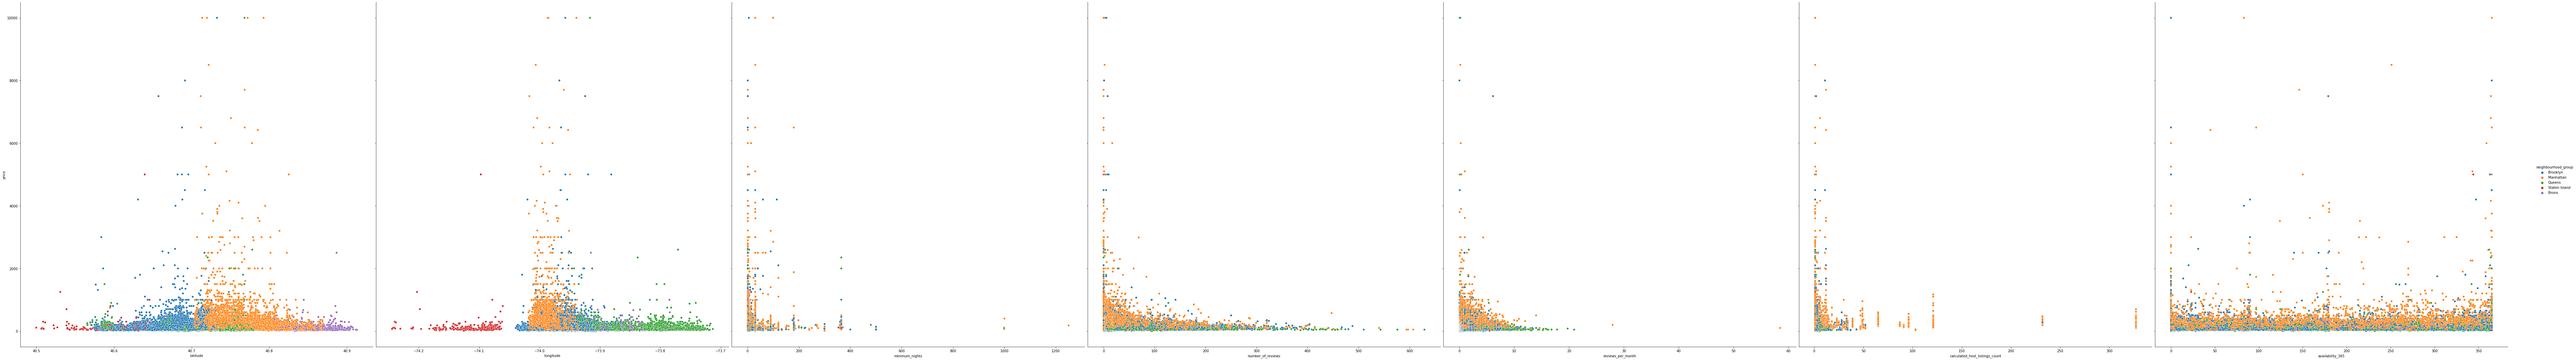

In [ ]:
sns.pairplot(df, y_vars=['price'], x_vars=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], height=15, hue='neighbourhood_group')

Also, how the prices vary with the number of nights?

In [ ]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
print(f'Percentile 95 of minimum_nights: {np.percentile(df["minimum_nights"], 95)}')
print(f'Mean of minimum_nights: {np.mean(df["minimum_nights"])}')
print(f"Mode of minimum_nights: {df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'].mode()[0]}")

Percentile 95 of minimum_nights: 30.0
Mean of minimum_nights: 7.029962163820431
Mode of minimum_nights: 1


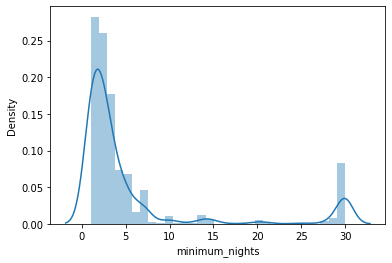

In [ ]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)

We can see that are a high number of rooms with minimum_nights=0 and some of them excesivelly high (1200). As explained by Dgomonov, this can be due to, at the time the data was gathered, the rooms were not available, or bad data. However, analyzing the distribution, we see that the normal value is arround 2 and the highest ones tend to be arround 30 nights

In [ ]:
d = df[df['minimum_nights'] < 30].groupby('minimum_nights')['price'].median()

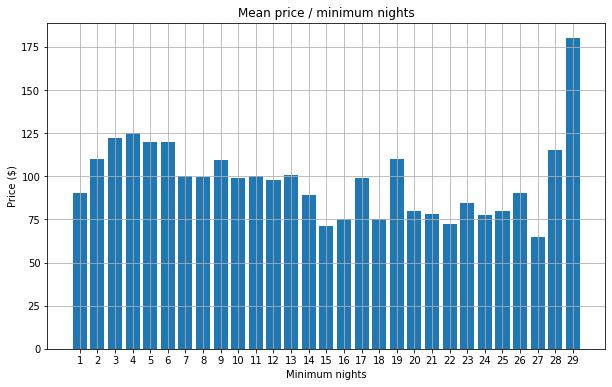

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.xticks(np.arange(min(d.keys().tolist()), max(d.keys().tolist())+1, 1.0))
plt.bar(d.keys().tolist(), d.tolist())
plt.title('Mean price / minimum nights')
plt.xlabel('Minimum nights')
plt.ylabel('Price ($)')
plt.grid(True)

Section conclusions

We can see several things:

1.Entire apartments are the most expensive ones (obviously)

2.Shared rooms tend to be more in the city centre.

3.The price distributions of each room type in the 5 different NY zones look similar, the most notable difference is on their means.

4.The price distributions of the room types point that, in general, shared and private rooms have similar prices (less deviation). On the other hand, entire apartaments have more variability (and are more expensive, obviously). We don't have data about the properties, but we can gess that other variables like square ft. or being near a metro station affect the price.

5.When looking at the Popularity/Price plot, we can see that rooms with more reviews tend to be cheaper (although the Entire appartment class is more noisy than the others). This can be explained as: the more expensive is an apartment, the less people stays there and therefore, the less reviews. This would be interesting to use in a model to predict prices or the popularity of a room.

6.It's generally cheaper to stay in rooms between 14 and 28 nights.

7.Usually, the minimum required nights to stay in a room is arround 2.

## **Question 14) overall posting analysis**

In this section the postings themselves are studied to infer information about the users who post rooms.

In [ ]:
host_listings_count = df.groupby('host_id')['calculated_host_listings_count'].mean()

In [ ]:
host_listings_count = df.groupby('host_id')['calculated_host_listings_count'].mean()

In [ ]:
summary = host_listings_count.describe()
summary

count    37457.000000
mean         1.305363
std          2.760747
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

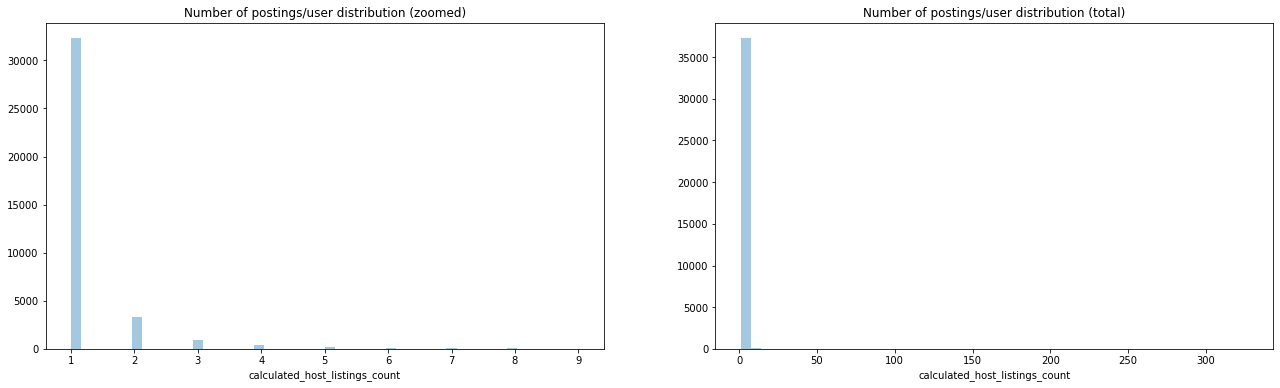

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(22,6))
sns.distplot(host_listings_count[host_listings_count < 10], kde=False, hist=True, ax=ax[0])
ax[0].set_title("Number of postings/user distribution (zoomed)")
sns.distplot(host_listings_count, kde=False, hist=True, ax=ax[1])
ax[1].set_title("Number of postings/user distribution (total)")
fig.show()

The distribution plot says us that most users have arround one listing on the platform, however, it strikes me that there are some outliers that have >300. Maybe they are professional users/agencies. Let's take a look. We can define the outliers as the ones who have p postings as  p>=μ+2σ

In [ ]:
user_outliers = host_listings_count[host_listings_count >= (summary['mean'] + 2*summary['std'])]
user_outliers

host_id
295128        7.0
310670       13.0
344035       13.0
417504       28.0
732460        7.0
             ... 
263504959     8.0
263880607     7.0
266726110     7.0
270874051     8.0
273354185     7.0
Name: calculated_host_listings_count, Length: 250, dtype: float64

Let's take a look at the "professional postings" to see if they differ from the "amateur" ones.

In [ ]:
posting_outliers = df[df['host_id'].isin(user_outliers.index.tolist())]
posting_normal = df[~df['host_id'].isin(user_outliers.index.tolist())]

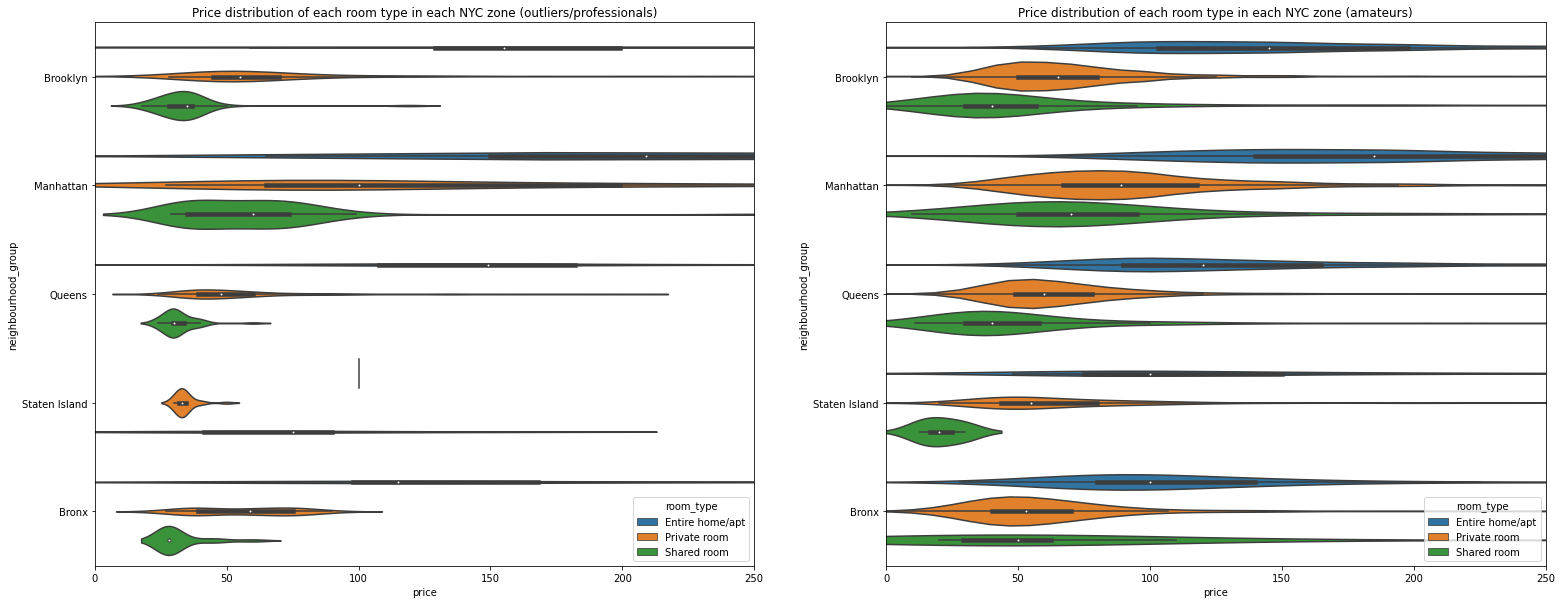

In [ ]:
palette ={"Entire home/apt":"C0","Private room":"C1","Shared room":"C2"}

fig, ax = plt.subplots(1,2, figsize=(26,10))

sns.violinplot(x="price", y="neighbourhood_group", hue="room_type", data=posting_outliers, ax=ax[0], 
               palette=palette, 
               order=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], 
               hue_order=['Entire home/apt', 'Private room', 'Shared room'])
ax[0].set_title("Price distribution of each room type in each NYC zone (outliers/professionals)")
ax[0].set_xlim(0,250)

sns.violinplot(x="price", y="neighbourhood_group", hue="room_type", data=posting_normal[posting_normal['price'] <= 900], ax=ax[1], 
               palette=palette, 
               order=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], 
               hue_order=['Entire home/apt', 'Private room', 'Shared room'])
ax[1].set_title("Price distribution of each room type in each NYC zone (amateurs)")
ax[1].set_xlim(0,250)

fig.show()

Section conclussions

1.There are two type of hosts: professional and amateurs.

2.The more rooms a user has, the more they tend to have clustered properties, maybe because they buy or rent the apartments/rooms in bulk.

3.The professional users post rooms with slighly higher price than the amateur ones.

4.The professional users tend to prefer centric zones